# Get POP settling to sediment

Import necessary modules:

In [1]:
from contaminant import Contaminant
import helper
%matplotlib inline

Configure settling speed (_wpoc_ ) and data directory.
The latter contains folders `pop1/`.. `pop7

In [2]:
DATA_DIR ='/media/ich/TOWER/m224013/model/output/ocean/PCBclim_cnt/'
WPOC = 10
DAYS_PER_MONTH = 30
KG_TO_MUG = 1e9

Create a contaminant instance, depending on your experiment setup, here:


| POP | species |
|-----| --------|
| 1   | PFOA |
| 2   | DDT  |
| 3   | DDE  |
| 4   | PCB-28 |
| 5   | PCB-101 |
| 6   | PCB-153 |
| 7   | PCB-180 |

In [3]:
pop = Contaminant(7, 'PCB-180')
pop.load(DATA_DIR)
sinking = pop.org_bottom * WPOC * DAYS_PER_MONTH * KG_TO_MUG
sinking.name = f"sinking of {pop.name}"

Get indices for location 63 S 56 W

In [4]:
georef = helper.GeoRef(sinking.lon, sinking.lat)
j, i = georef.get_indices(longitude=304, latitude=-63)

 ## Plotting

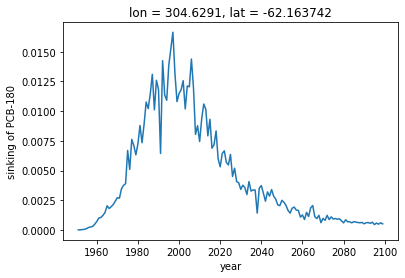

In [5]:
sinking[:,j,i].groupby('time.year').sum().plot()